In [22]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

data = loadmat('AQUA.2013089.2055.mat') #reading my file
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'RGB', 'ICE', 'B4', 'B5', 'B6', 'B7', 'B1', 'B2', 'B3'])


In [23]:
b1 = data['B1'] #extracting band 1
print(b1.shape) #array dimensions
print('max:', round(b1.max(),2)) #max pix values
print('min:', round(b1.min(),2))
print('mean:', round(b1.mean(),2)) #average pix values

(914, 667)
max: 1.04
min: 0.39
mean: 0.73


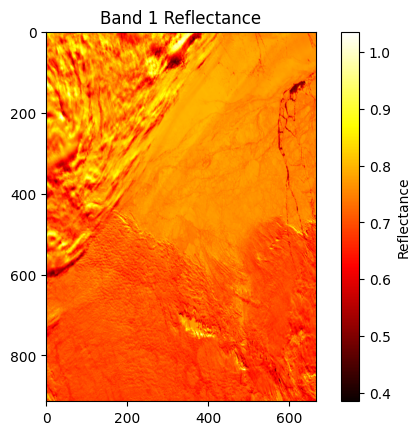

In [47]:
figure, axis = plt.subplots()
cmap = plt.get_cmap('hot')
image = axis.imshow(b1, cmap=cmap)
cbar = figure.colorbar(image, ax=axis)
cbar.set_label('Reflectance')
plt.title('Band 1 Reflectance')
plt.show()

C:\Users\Jezle\AppData\Local\Temp\ipykernel_16072\3617492797.py:3: UserWarning: Adding colorbar to a different Figure <Figure size 640x480 with 2 Axes> than <Figure size 640x480 with 1 Axes> which fig.colorbar is called on.
  cbar = fig.colorbar(image)


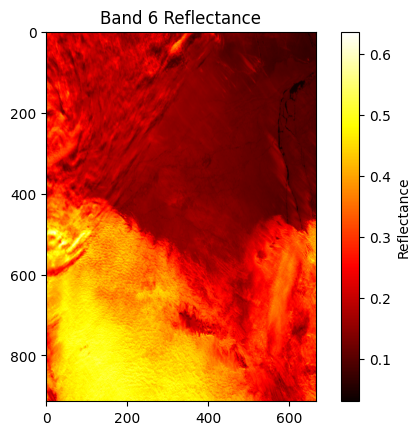

In [48]:
figure, axis = plt.subplots()
image = axis.imshow(data['B6'], cmap='hot')
cbar = fig.colorbar(image)
cbar.set_label('Reflectance')
plt.title('Band 6 Reflectance')
plt.show()

In [49]:
num_pixels = b1.size #computing the sample size
print('Total pixels:', num_pixels)

Total pixels: 609638


In [50]:
percent = 0.0045  
num_samp = int(num_pixels * percent) #converting fraction into an integer count of pixels

index = np.arange(num_pixels) #creating the array
np.random.shuffle(index) #shuffling index order
index = index[:num_samp]

In [51]:
b6 = data['B6']
b1_samples = b1.ravel()[index]
b6_samples = b6.ravel()[index]

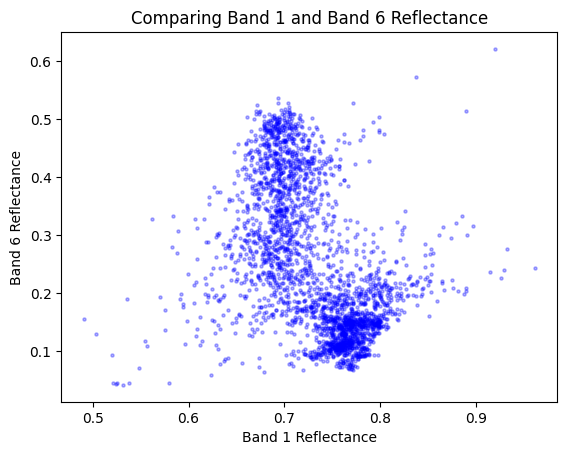

In [52]:
figure, axis = plt.subplots()
axis.scatter(b1_samples, b6_samples, s=5, alpha=0.3, color='blue', marker='o')
axis.set_title('Comparing Band 1 and Band 6 Reflectance')
axis.set_xlabel('Band 1 Reflectance')
axis.set_ylabel('Band 6 Reflectance')
plt.show()

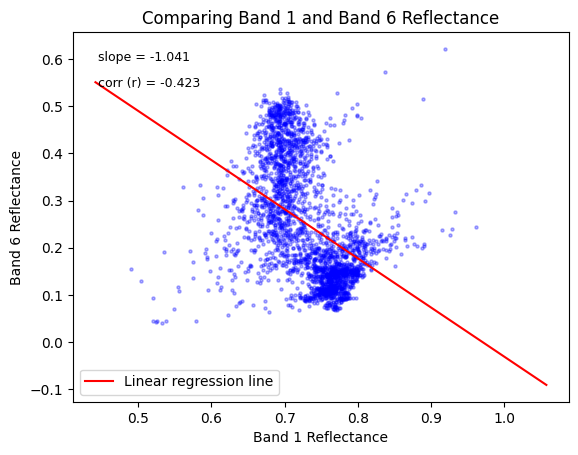

In [53]:
m, b = np.polyfit(b1_samples, b6_samples, 1) #computing the regression
x_line = np.linspace(b1_samples.min()*0.9, b1_samples.max()*1.1, 100)
y_line = np.polyval([m, b], x_line)

figure, axis = plt.subplots()
axis.scatter(b1_samples, b6_samples, s=5, alpha=0.3, color='blue')
axis.plot(x_line, y_line, color='red', label='Linear regression line')
r, p = stats.pearsonr(b1_samples, b6_samples)
axis.text(0.05, 0.95, f'slope = {m:.3f}', transform=axis.transAxes, fontsize=9, va='top')
axis.text(0.05, 0.88, f'corr (r) = {r:.3f}', transform=axis.transAxes, fontsize=9, va='top')
axis.set_title('Comparing Band 1 and Band 6 Reflectance')
axis.set_xlabel('Band 1 Reflectance')
axis.set_ylabel('Band 6 Reflectance')
axis.legend()
plt.show()

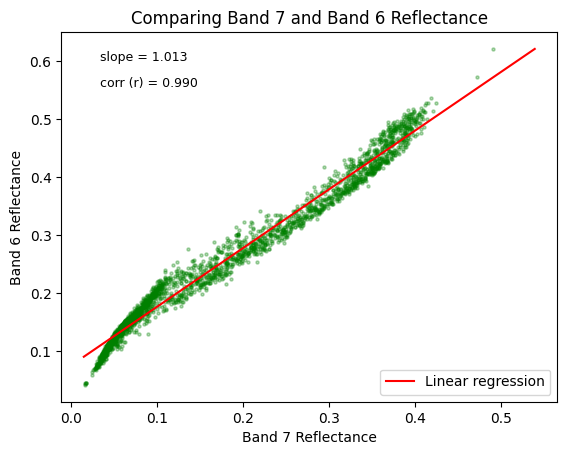

In [54]:
b7 = data['B7']
b7_samples = b7.ravel()[index]
m2, b2 = np.polyfit(b7_samples, b6_samples, 1)
x_line2 = np.linspace(b7_samples.min()*0.9, b7_samples.max()*1.1, 100)
y_line2 = np.polyval([m2, b2], x_line2)
r2, p2 = stats.pearsonr(b7_samples, b6_samples)

figure, axis = plt.subplots()
axis.scatter(b7_samples, b6_samples, s=5, alpha=0.3, color='green')
axis.plot(x_line2, y_line2, color='red', label='Linear regression')
axis.text(0.05, 0.95, f'slope = {m2:.3f}', transform=ax.transAxes, fontsize=9, va='top')
axis.text(0.05, 0.88, f'corr (r) = {r2:.3f}', transform=ax.transAxes, fontsize=9, va='top')
axis.set_title('Comparing Band 7 and Band 6 Reflectance')
axis.set_xlabel('Band 7 Reflectance')
axis.set_ylabel('Band 6 Reflectance')
axis.legend()
plt.show()